In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
EPSILON = 0.1

In [2]:
index_map = [[(i + 12*j) for i in range(12)] for j in range(4)]
reverse_map = {}
for i in range(len(index_map)):
    for j in range(len(index_map[i])):
        reverse_map[index_map[i][j]] = [i,j]
        

allowed = [[-1,0],[1,0],[0,-1],[0,1]]

def make_move(cur_state, action_index):
    cur_action = allowed[action_index]
    if cur_state >= 37 and cur_state <= 46:
        next_state = 36
        reward = -100
    else:
        reward = -1
        
        cur_row_col = reverse_map[cur_state]
        cur_row = cur_row_col[0]
        cur_col = cur_row_col[1]
        
        new_row = cur_row + cur_action[0]
        new_col = cur_col + cur_action[1]
        
        if new_row > -1 and new_row < 4 and new_col > -1 and new_col < 12:
            next_state = index_map[new_row][new_col]
            if next_state == 47:
                reward = 0
        else:
            next_state = index_map[cur_row][cur_col]
    return next_state, reward

def pick_action(cur_state, value_action):
    r = random.random()
    if r <= EPSILON:
        return random.randint(0,3)
    b = value_action[cur_state].copy()
    action_index = np.random.choice(np.flatnonzero(b == b.max()))
    return action_index

def play_sarsa():
    alpha = 0.5    
    value_action = np.zeros((48,4))
    rewards = np.zeros(500)
    
    for ep in range(500):
        cur_state = 36
        action_index = pick_action(cur_state, value_action)
        while (cur_state != 47):
            next_state, reward = make_move(cur_state, action_index)
            rewards[ep] += reward
            
            next_action_index = pick_action(next_state, value_action)
            
            cur_value = value_action[cur_state][action_index]
            next_value = value_action[next_state][next_action_index]
            update = reward + next_value - cur_value
            
            value_action[cur_state][action_index] += alpha * update
            
            cur_state = next_state
            action_index = next_action_index
        rewards[ep] = max(rewards[ep],-100)
    return rewards

def play_q():
    alpha = 0.5
    value_action = np.zeros((48,4))
    rewards = np.zeros(500)
    
    for ep in range(500):
        cur_state = 36
        while (cur_state != 47):
            action_index = pick_action(cur_state, value_action)
            next_state, reward = make_move(cur_state, action_index)
            rewards[ep] += reward
            
            cur_value = value_action[cur_state][action_index]
            update = reward + np.max(value_action[next_state]) - cur_value
            value_action[cur_state][action_index] += alpha * update
            
            cur_state = next_state
        rewards[ep] = max(rewards[ep],-100)
    return rewards
index_map

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]


 31%|███       | 155/500 [01:51<09:14,  1.61s/it]


 62%|██████▏   | 309/500 [03:52<02:08,  1.48it/s]


 93%|█████████▎| 463/500 [05:28<00:21,  1.72it/s]


 24%|██▎       | 118/500 [01:23<04:55,  1.29it/s]


 54%|█████▍    | 272/500 [03:24<04:47,  1.26s/it]


 85%|████████▌ | 426/500 [05:10<00:46,  1.59it/s]


100%|██████████| 500/500 [05:53<00:00,  1.72it/s]

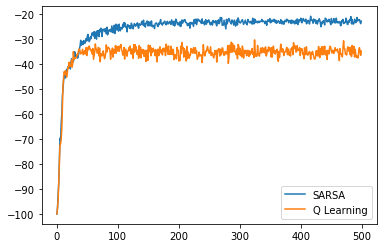

In [4]:
sarsa_runs = np.zeros((500,500))
q_runs = np.zeros((500,500))
for i in tqdm(range(500)):
    cur_sarsa = play_sarsa()
    sarsa_runs[i] = cur_sarsa 
plt.plot(np.mean(sarsa_runs, axis = 0), label = 'SARSA')
for i in tqdm(range(500)):
    cur_q = play_q()
    q_runs[i] = cur_q
plt.plot(np.mean(q_runs, axis = 0), label = 'Q Learning')
plt.legend()